In [116]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize
from collections import Counter
import nltk, string
import matplotlib
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import *
from sklearn import metrics
from sklearn import model_selection
from sklearn import feature_extraction
from sklearn.metrics import classification_report
matplotlib.style.use('ggplot')
pd.set_option('display.max_colwidth', -1)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [3]:
true = pd.read_csv("./data/true.csv")
fake = pd.read_csv("./data/fake.csv")

In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true['category'] = 1
fake['category'] = 0

In [11]:
df = pd.concat([true,fake]) 
data = shuffle(df)
data = data.reset_index(drop=True)


In [12]:
data.drop(["date"])

,title,text,subject,date,category
0,Senator McCain suggests subpoena to make White...,WASHINGTON (Reuters) - Senator John McCain sug...,politicsNews,"October 19, 2017",1
1,Republicans Were Just Told To Stop Talking Ab...,Remember when Republicans were told to stop ta...,News,"May 12, 2017",0
2,Trump Fan Violently Attacks Black Protester —...,"Donald Trump seems to love it when his rabid, ...",News,"March 10, 2016",0
3,Trump to pitch 'America First' agenda in U.N. ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 14, 2017",1
4,Senate Democrats vow to fight any Supreme Cour...,WASHINGTON (Reuters) - U.S. Senate Democratic ...,politicsNews,"January 24, 2017",1
...,...,...,...,...,...
44893,WATCH: Van Jones Scorches Insane Republican W...,Donald Trump is an extreme narcissist who alwa...,News,"October 15, 2017",0
44894,LET’S PLAY! CAN YOU ANSWER The 21 Questions Th...,CAN YOU DO IT? WE D LOVE TO KNOW WHAT SURPRISE...,Government News,"Feb 6, 2016",0
44895,RADICAL ERIC HOLDER STIRS THE POT…Claims Repub...,,left-news,"Jan 12, 2017",0
44896,"China punishes over 8,000 people for misuse of...","SHANGHAI (Reuters) - China has punished 8,123 ...",worldnews,"December 23, 2017",1


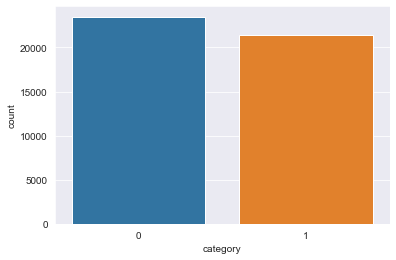

In [18]:
sns.set_style("darkgrid")
sns.countplot(data.category)


In [19]:
data.isna().sum()


title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [20]:
data.subject.value_counts()


politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

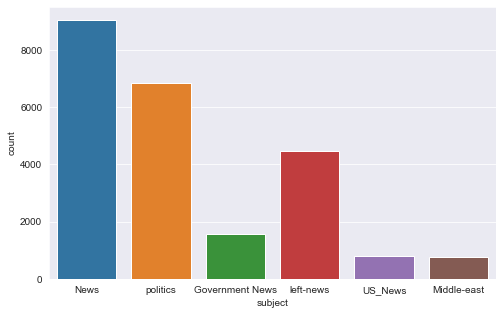

In [21]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fake)
plt.show()

In [22]:
data["full_text"] = data["title"]+" "+data["text"]

In [71]:
stop_words = set(stopwords.words('english'))
punct = re.compile(r'(\w+)')

def normalize_sentence(txt): 
    #string to lowercase
    txt = txt.lower()
    #punctuation removal and map it to space
    tokenized = [m.group() for m in punct.finditer(txt)]
    s = ' '.join(tokenized)

    #remove digits 
    no_digits = ''.join([i for i in s if not i.isdigit()])
    cleaner = " ".join(no_digits.split())
    
    #tokenize words and removing stop words 
    word_tokens = word_tokenize(cleaner)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = " ".join(filtered_sentence)
    return filtered_sentence

#creating column with cleaned and normalized text 
data['ntext'] = data.full_text.apply(normalize_sentence)
#data['normalized_text'] = data.text.apply(stemming_words)
data.head()

,title,text,subject,date,category,full_text,ntext
0,Senator McCain suggests subpoena to make White...,WASHINGTON (Reuters) - Senator John McCain sug...,politicsNews,"October 19, 2017",1,Senator McCain suggests subpoena to make White...,senator mccain suggests subpoena make white ho...
1,Republicans Were Just Told To Stop Talking Ab...,Remember when Republicans were told to stop ta...,News,"May 12, 2017",0,Republicans Were Just Told To Stop Talking Ab...,republicans told stop talking healthcare repea...
2,Trump Fan Violently Attacks Black Protester —...,"Donald Trump seems to love it when his rabid, ...",News,"March 10, 2016",0,Trump Fan Violently Attacks Black Protester —...,trump fan violently attacks black protester gu...
3,Trump to pitch 'America First' agenda in U.N. ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 14, 2017",1,Trump to pitch 'America First' agenda in U.N. ...,trump pitch america first agenda u n debut pre...
4,Senate Democrats vow to fight any Supreme Cour...,WASHINGTON (Reuters) - U.S. Senate Democratic ...,politicsNews,"January 24, 2017",1,Senate Democrats vow to fight any Supreme Cour...,senate democrats vow fight supreme court pick ...


In [72]:
data.ntext.values[4]

'senate democrats vow fight supreme court pick mainstream washington reuters u senate democratic leader chuck schumer said told president donald trump white house meeting tuesday senate democrats would fight supreme court nominee outside mainstream trump said tuesday would announce supreme court pick next week lifetime appointment supreme court justice requires senate confirmation said many times believe president pick mainstream nominee could earn bipartisan support vacant supreme court seat schumer said statement reiterated view meeting today told senate democrats would fight nominee outside mainstream said'

In [74]:
freq = pd.Series(' '.join(data['ntext']).split()).value_counts()[:3]
data['ntext'] = data['ntext'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [78]:
all_docs = list(data.ntext.values)
word_frequencies = pd.DataFrame(data.ntext.str.split(expand=True).stack().value_counts(),columns = ["frequency"])
word_frequencies.reset_index(inplace=True)
word_frequencies.rename(columns={'index':'word'},inplace=True)
word_frequencies.head(5)

,word,frequency
0,president,57648
1,would,55666
2,people,42494
3,one,38741
4,state,35619


In [81]:
count_true = Counter(" ".join(data[data['category']==1]["ntext"]).split()).most_common(30)
df1 = pd.DataFrame.from_dict(count_true)
df1 = df1.rename(columns={0: "True news", 1 : "count"})

count_fake = Counter(" ".join(data[data['category']==0]["ntext"]).split()).most_common(30)
df2 = pd.DataFrame.from_dict(count_fake)
df2 = df2.rename(columns={0: "Fake news", 1 : "count"})

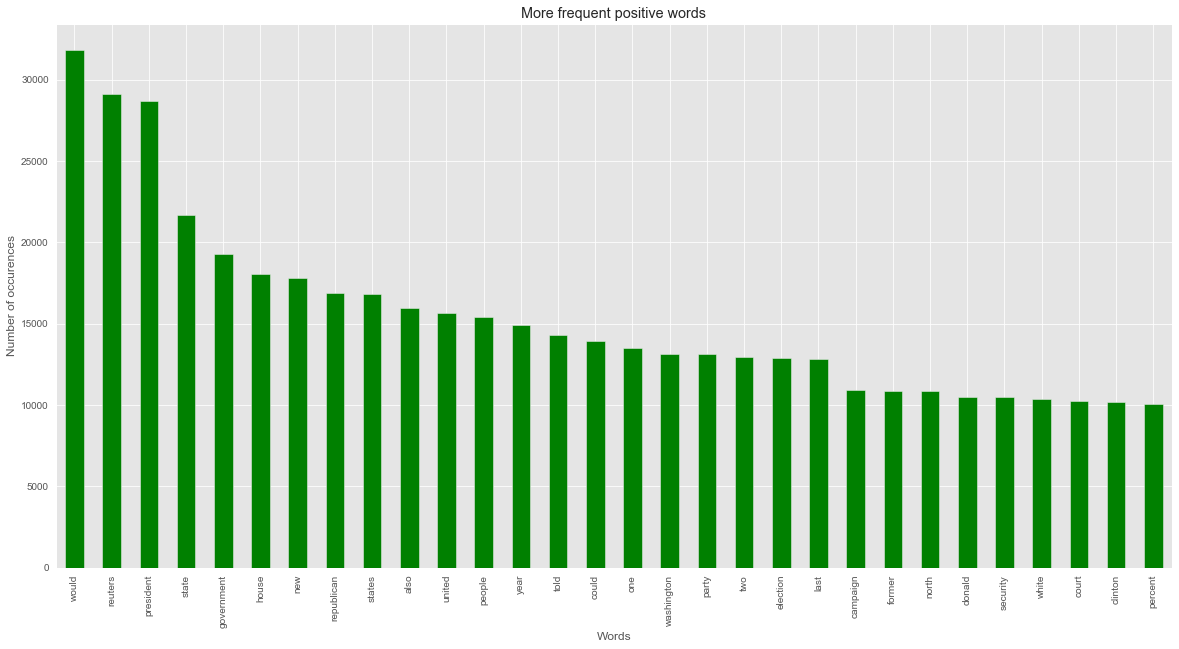

In [86]:
df1.plot.bar(legend = False,color = 'Green')
y_pos = np.arange(len(df1["True news"]))
plt.xticks(y_pos, df1["True news"])
plt.title('More frequent positive words')
plt.xlabel('Words')
plt.ylabel('Number of occurences')
plt.show()

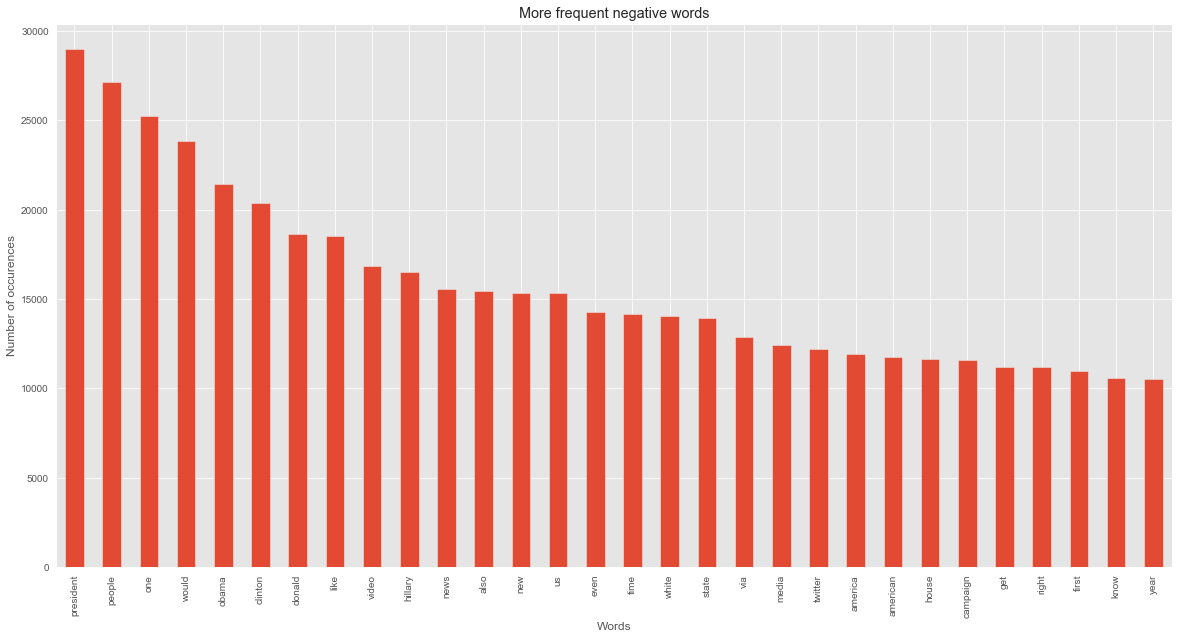

In [87]:
df2.plot.bar(legend = False)
y_pos = np.arange(len(df2["Fake news"]))
plt.xticks(y_pos, df2["Fake news"])
plt.title('More frequent negative words')
plt.xlabel('Words')
plt.ylabel('Number of occurences')
plt.show()

In [91]:
def wordcloud_function(doc):
    corpus =(" ").join(doc)
    wordcloud = WordCloud(width = 1000, height = 500, max_words=100, background_color="white").generate(corpus)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("wordcloud"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

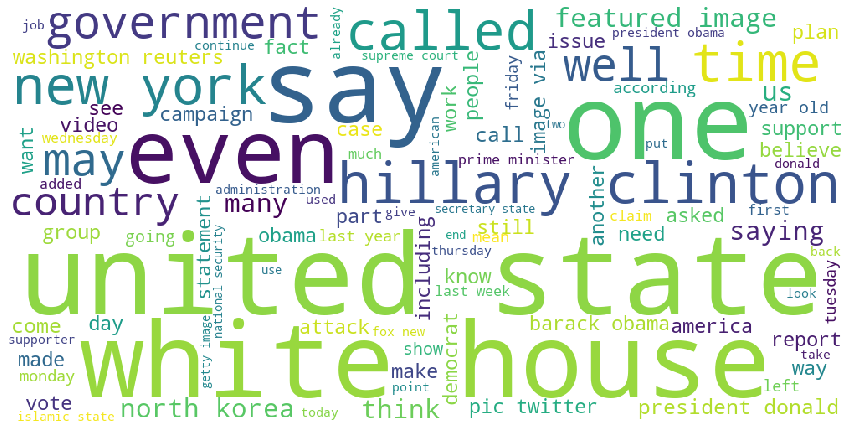

In [92]:
wordcloud_function(all_docs)

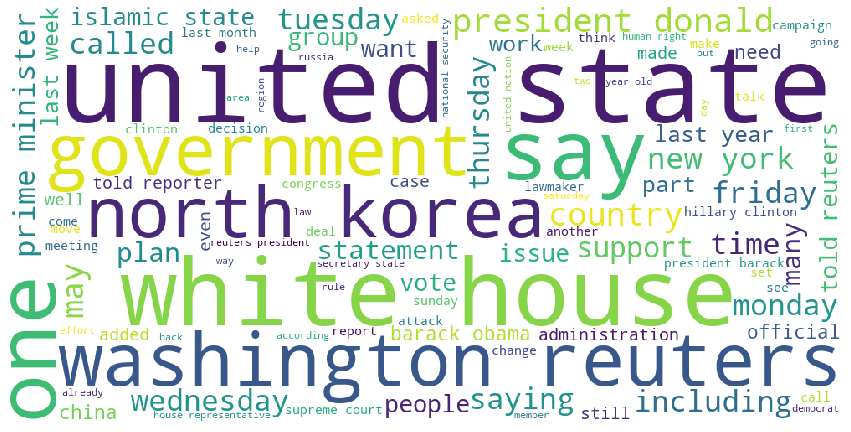

In [93]:
real_docs = list(data['ntext'][data['category']==1])
#wordcloud of real news
wordcloud_function(real_docs)

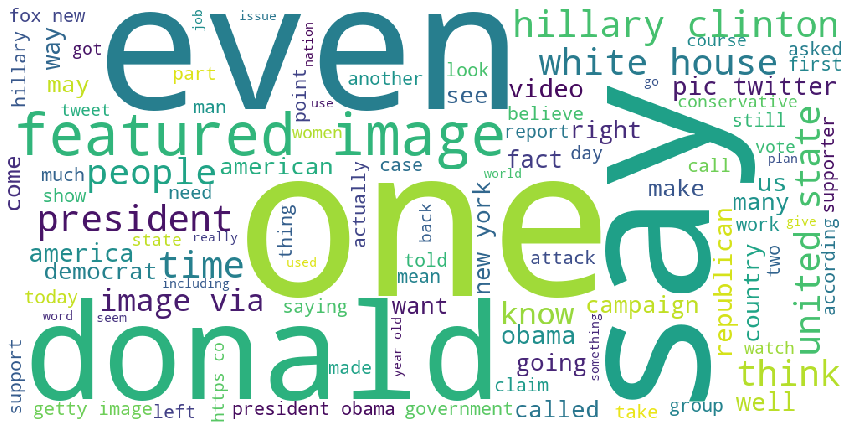

In [95]:
fake_docs = list(data['ntext'][data['category']==0])
#wordcloud of real news
wordcloud_function(fake_docs)

In [114]:
def featureExtraction(data):
    vect = TfidfVectorizer()
    tfidf_data = vect.fit_transform(data)
    return tfidf_data

In [110]:
def learning(clf, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=60) #60
    classifier = clf()#4800-br #5900 #6200 #6700 #6800 #7800-ba #7800 #8800
    classifier.fit(X_train, Y_train)
    predict = classifier.predict(X_test)  
    return predict, X_train, X_test, classifier, Y_test, Y_train

In [111]:
def model_evaluation(classifier, predict, X_train, Y_train, X_test, Y_test):
    print("Train Accuracy : {}%".format(round(classifier.score(X_train, Y_train)*100,1)))        #training accuracy
    print("Test Accuracy : {}%".format(round(classifier.score(X_test, Y_test)*100,1)))           #Test accuracy
    print("Test precision : {}%".format(round( metrics.precision_score(Y_test, predict)*100,1))) #Test precision
    print("Recall : {}%".format(round(metrics.recall_score(Y_test,predict)*100,1)))              #Recall
    print(classification_report(predict, Y_test))                                             #Classification report
    m_confusion_test = metrics.confusion_matrix(Y_test, predict)    
    
    #Confusion Matrix
    pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(m_confusion_test, cmap=plt.cm.RdPu_r, alpha=0.1)
    for i in range(m_confusion_test.shape[0]):
        for j in range(m_confusion_test.shape[1]):
            ax.text(x=j, y=i, s=m_confusion_test[i, j], va='center', ha='center')
    plt.title('SVC Linear Kernel \nRecall: {0:.1f}%'.format(metrics.recall_score(Y_test,predict)*100))
    plt.xlabel('PREDICTED LABELS')
    plt.ylabel('ACTUAL LABELS')
    plt.tight_layout()

In [112]:
def main(clf):
    data_train, polarity = data.ntext, data.category
    tfidf_data = featureExtraction(data_train)
    pred, X_train, X_test, classifier, Y_test, Y_train  = learning(clf, tfidf_data, polarity)
    model_evaluation(classifier, pred, X_train, Y_train, X_test, Y_test)
    return classifier

Train Accuracy : 100.0%
Test Accuracy : 99.5%
Test precision : 99.5%
Recall : 99.5%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4668
           1       1.00      0.99      1.00      4312

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



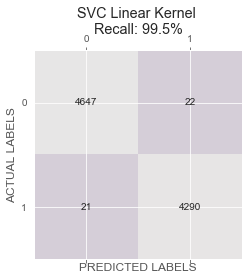

In [117]:
classifier = main(SVC)